# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [36]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
import requests
import time
from winsound import Beep


# Import API key
from api_keys import *

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
outputDataFile = "../output_data/"
apiKey = weather_api_key

# Range of latitudes and longitudes
latRange = (-90, 90)
longRange = (-180, 180)\

frequency = 500
duration = 300

print(apiKey)

0177f35c8f92d24e465dedcf1d6022b6


## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
latLongs = []
cities = []
nations = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(latRange[0], latRange[1], size=1500)
longs = np.random.uniform(longRange[0], longRange[1], size=1500)
latLongs = zip(lats, longs)

# Identify nearest city for each lat, lng combination
for latLong in latLongs:
    city = citipy.nearest_city(latLong[0], latLong[1]).city_name
    nation = citipy.nearest_city(latLong[0], latLong[1]).country_code
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        nations.append(nation.upper())

# Print the city count to confirm sufficient count
print(len(cities))
print(len(nations))

601
601


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
returnCount = 0
groupCount = 0
cityIndex = 0
cloudList = []
dateList = []
humidityList = []
latitudeList = []
longitudeList = []
maxTempList = []
windspeedList = []
removeList = []


startDeclaration = "###################\n Start API Request \n###################"
endDeclaration = "######################\n Complete API Request \n#######################"

baseUrl = f"http://api.openweathermap.org/data/2.5/weather?appid={apiKey}&units=imperial&q="

print(startDeclaration)
for city in cities:
    
    apiReturn = requests.get(baseUrl + city.replace(" ","&")).json()

    try:
        # print(f'Processing Weather Data for Record {returnCount} of Group {groupCount} | {apiReturn["name"]}')
        
        if apiReturn["main"]["humidity"] <= 100:
            cloudList.append(apiReturn["clouds"]["all"])
            dateList.append(apiReturn["dt"])
            humidityList.append(apiReturn["main"]["humidity"])
            latitudeList.append(apiReturn["coord"]["lat"])
            longitudeList.append(apiReturn["coord"]["lon"])
            maxTempList.append(apiReturn["main"]["temp_max"])
            windspeedList.append(apiReturn["wind"]["speed"])
    
    except (KeyError, IndexError):
        # print("City not found....Skipping............")
        removeList.append(cityIndex)
        print(removeList[-1])
        
    if returnCount == 55:
        groupCount += 1
        returnCount = 0
        time.sleep(60)
        
    returnCount += 1
    cityIndex += 1

print(endDeclaration)

Beep(frequency, duration)
time.sleep(1)
Beep(frequency, duration)
time.sleep(1)
Beep(frequency, duration)
time.sleep(1)
Beep(frequency, duration)
time.sleep(1)
Beep(frequency, duration)
time.sleep(1)
Beep(frequency, duration)
time.sleep(1)
Beep(frequency, duration)


###################
 Start API Request 
###################
12
21
27
51
64
91
92
102
111
118
120
127
130
134
139
148
185
190
195
197
201
216
218
219
220
240
241
243
253
256
285
308
311
322
331
333
338
350
360
380
389
410
414
442
471
472
475
491
500
502
511
527
531
541
545
547
559
565
576
584
595
######################
 Complete API Request 
#######################


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
nuCities = cities
nuNations = nations

print(
    f"cities count: {len(nuCities)} \n"
    f"nations count: {len(nuNations)} \n"
    f"clouds count: {len(cloudList)} \n"
    f"date count: {len(dateList)} \n"
    f"humidity count: {len(humidityList)} \n"
    f"lat count: {len(latitudeList)} \n"
    f"long count: {len(longitudeList)} \n"
    f"temp count: {len(maxTempList)} \n"
    f"wind speed count: {len(windspeedList)} \n"
    )

cities count: 601 
nations count: 601 
clouds count: 540 
date count: 540 
humidity count: 540 
lat count: 540 
long count: 540 
temp count: 540 
wind speed count: 540 



In [6]:
removeList.reverse()
for item in removeList:
    nuCities.pop(item)
    nuNations.pop(item)

print(
    f"cities count: {len(nuCities)} \n"
    f"nations count: {len(nuNations)} \n"
    f"clouds count: {len(cloudList)} \n"
    f"date count: {len(dateList)} \n"
    f"humidity count: {len(humidityList)} \n"
    f"lat count: {len(latitudeList)} \n"
    f"long count: {len(longitudeList)} \n"
    f"temp count: {len(maxTempList)} \n"
    f"wind speed count: {len(windspeedList)} \n"
    )



cities count: 540 
nations count: 540 
clouds count: 540 
date count: 540 
humidity count: 540 
lat count: 540 
long count: 540 
temp count: 540 
wind speed count: 540 



In [22]:
weatherDict = {
    "City" : nuCities,
    "Cloudiness" : cloudList,
    "Nation" : nuNations,
    "Date" : dateList,
    "Humidity" : humidityList,
    "Latitude" : latitudeList,
    "Longitude" : longitudeList,
    "Max Temp" : maxTempList,
    "Wind Speed" : windspeedList
}

weatherFrame = pd.DataFrame(weatherDict)
weatherFrame.to_csv(outputDataFile + "citiesFinal.csv")
weatherFrame.head()

,City,Cloudiness,Nation,Date,Humidity,Latitude,Longitude,Max Temp,Wind Speed
0,numan,81,NG,1618846415,13,9.4667,12.0333,107.26,4.09
1,mar del plata,40,AR,1618846415,72,43.4002,-4.0094,60.01,8.05
2,morehead,1,PG,1618846351,67,37.2711,-87.1764,57.20,3.44
3,vanimo,100,PG,1618846415,87,-2.6741,141.3028,75.43,3.65
4,pevek,28,RU,1618846304,94,69.7008,170.3133,1.65,6.11


In [15]:
nuWeatherFrame = weatherFrame
nuWeatherFrame.head()

,City,Cloudiness,Nation,Date,Humidity,Latitude,Longitude,Max Temp,Wind Speed
0,numan,81,NG,1618846415,13,9.4667,12.0333,107.26,4.09
1,mar del plata,40,AR,1618846415,72,43.4002,-4.0094,60.01,8.05
2,morehead,1,PG,1618846351,67,37.2711,-87.1764,57.20,3.44
3,vanimo,100,PG,1618846415,87,-2.6741,141.3028,75.43,3.65
4,pevek,28,RU,1618846304,94,69.7008,170.3133,1.65,6.11


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [11]:
# these data points were removed in the API calls
nuWeatherFrame.describe()

,Cloudiness,Date,Humidity,Latitude,Longitude,Max Temp,Wind Speed
count,540.000000,5.400000e+02,540.000000,540.000000,540.000000,540.000000,540.000000
mean,53.394444,1.618847e+09,62.950000,21.610511,21.765325,62.237870,8.324389
std,38.158321,2.723015e+02,24.208267,32.497505,86.508644,23.866979,5.456748
min,0.000000,1.618846e+09,4.000000,-54.800000,-175.200000,-13.450000,0.220000
25%,19.750000,1.618846e+09,48.000000,-5.783750,-51.255400,48.792500,4.447500
50%,58.500000,1.618847e+09,67.000000,26.141200,23.709150,66.000000,6.910000
75%,90.000000,1.618847e+09,82.000000,48.511175,96.459650,80.017500,11.010000
max,100.000000,1.618847e+09,100.000000,78.218600,178.416700,107.260000,36.820000


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

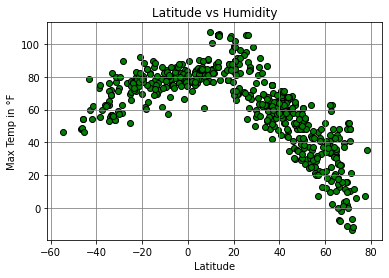

In [29]:
plt.scatter(nuWeatherFrame["Latitude"], nuWeatherFrame["Max Temp"], edgecolors = "black", facecolors = "green")
plt.grid(b = True, which = "both", color = "grey")
plt.ylabel("Max Temp in °F")
plt.xlabel("Latitude")
plt.title("Latitude vs Humidity")
plt.show()
plt.savefig(outputDataFile + "Fig1.png")


## Latitude vs. Humidity Plot

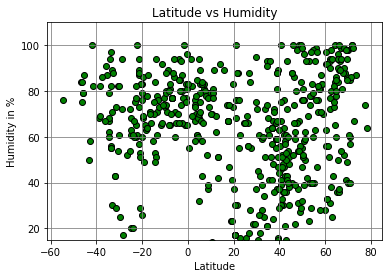

In [28]:
plt.scatter(nuWeatherFrame["Latitude"], nuWeatherFrame["Humidity"], edgecolors = "black", facecolors = "green")
plt.grid(b = True, which = "both", color = "grey")
plt.ylim(15, 110)
plt.ylabel("Humidity in %")
plt.xlabel("Latitude")
plt.title("Latitude vs Humidity")
plt.show()
plt.savefig(outputDataFile + "Fig2.png")


## Latitude vs. Cloudiness Plot

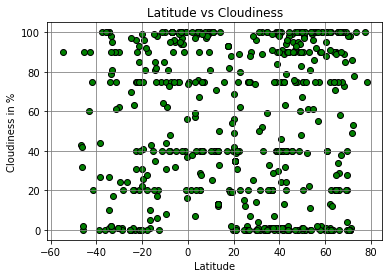

In [31]:
plt.scatter(nuWeatherFrame["Latitude"], nuWeatherFrame["Cloudiness"], edgecolors = "black", facecolors = "green")
plt.grid(b = True, which = "both", color = "grey")
plt.ylabel("Cloudiness in %")
plt.xlabel("Latitude")
plt.title("Latitude vs Cloudiness")
plt.show()
plt.savefig(outputDataFile + "Fig3.png")


## Latitude vs. Wind Speed Plot

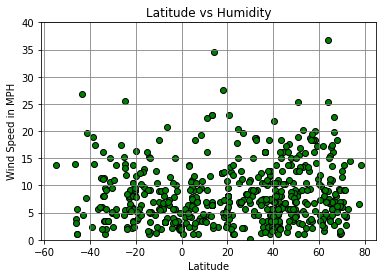

In [32]:
plt.scatter(nuWeatherFrame["Latitude"], nuWeatherFrame["Wind Speed"], edgecolors = "black", facecolors = "green")
plt.grid(b = True, which = "both", color = "grey")
plt.ylim(0, 40)
plt.ylabel("Wind Speed in MPH")
plt.xlabel("Latitude")
plt.title("Latitude vs Humidity")
plt.show()
plt.savefig(outputDataFile + "Fig4.png")


## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.396


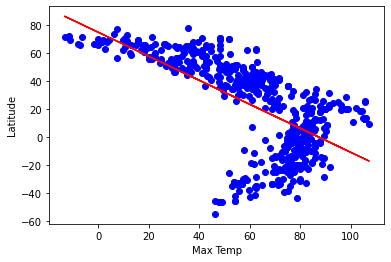

In [42]:
weaFrame = nuWeatherFrame.groupby(["City"]).mean() 

xValues = weaFrame["Max Temp"]
yValues = weaFrame["Latitude"]

(slope, intercept, rvalue, pvalue, stdrr) = st.linregress(xValues, yValues)
regressVal = xValues * slope + intercept

line = (f"y = {round(slope, 2)} x + {round(intercept, 2)}")

plt.scatter(xValues, yValues,color='b')

plt.plot(weaFrame["Max Temp"], regressVal, color='red')
plt.xlabel("Max Temp")
plt.ylabel("Latitude")
print(f"The r-squared is: {round(rvalue**2,3)}")

plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression